# Time and Word Counting

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [48]:
df = pd.read_csv('../data/clean_whatsapp.csv')

In [49]:
'''Using regular expressions to apply a word count on every message'''

#Count
def word_count(line):
    wordCount = len(re.findall(r'\w+', line))
    return wordCount

#Append
df['wordcount'] = df['message'].apply(word_count)

#plot
df['wordcount'].plot()

In [52]:
'''For datetime to be used for grouping we need to convert the string to a recognised datetime format'''

df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y, %H:%S')

In [168]:
'''The following function takes a dataframe containing messages and a datetime and groups and sums the total
messages. It then returns a graph of the output and a dataframe containing message data per hour starting at
00:00. It contains columns for each chat memeber as well as a cumulative total'''


def average_day(df):
    
    time_df = pd.DataFrame(index = np.arange(24))    #create a blank indexed dataframe
    nameList = df['name'].unique()    #get a list of users
    timePeriod = len(df['datetime'].dt.date.unique())    #get the number of days the chat log is over
    
    for names in nameList:
        output = pd.DataFrame(df.loc[df['name']== names].groupby(df['datetime'].dt.hour)['message'].count())
        time_df[names] = output['message']/timePeriod
    time_df['Total'] = time_df.sum(axis = 1)    #disable for chats with lots of members!
   
    plt.plot(time_df)    #plot the dataframe to compare users and the total
    plt.title("Hourly Average")
    plt.legend(nameList)
    plt.xlabel("Hour")
    plt.ylabel("Messages")
    
    return time_df    #return the associated data frame

## Looking at Outputs

,David,Iubire,Total
0,2.870229,3.129771,6.000000
1,1.610687,1.961832,3.572519
2,0.343511,0.595420,0.938931
3,0.183206,0.450382,0.633588
4,0.236641,0.244275,0.480916


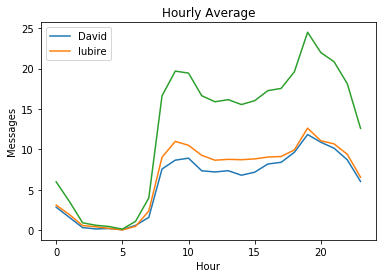

In [169]:
hour_df = average_day(df)
hour_df.head()